Metro Pt

In [34]:
import pandas as pd
import gc
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
def plot_columns(df, x_col, y_col, title="Scatter Plot", xlabel=None, ylabel=None):

    plt.figure(figsize=(10, 5))
    plt.plot(df[x_col], df[y_col], marker='o', linestyle='-')

    plt.xlabel(xlabel if xlabel else x_col)
    plt.ylabel(ylabel if ylabel else y_col)
    plt.title(title)
    plt.grid(True)
    plt.show()


In [35]:
def plot_box(df, column, title="Box Plot", ylabel=None):

    plt.figure(figsize=(8, 5))
    sns.boxplot(y=df[column])
    
    plt.title(title)
    plt.ylabel(ylabel if ylabel else column)
    plt.grid(True)
    plt.show()

In [39]:
def filter_a_day(specific_date):

    
    df_filtered = df[df['timestamp'].dt.date == pd.to_datetime(specific_date).date()]

    df_filtered = df_filtered.reset_index(drop=True)

    return df_filtered

In [41]:
def aggregate_as_a_minute(df_day1):
    df_day1 = df_day1.set_index('timestamp')

    # Resample data by minute and compute mean
    df_minute_avg_day1 = df_day1.resample('T').mean().reset_index()

    return df_minute_avg_day1

In [2]:
df = pd.read_csv("/Users/abdullahfurkanarslan/Desktop/Final Project/MetroPT2.csv")
df.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Flowmeter,Motor_current,COMP,...,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,gpsLong,gpsLat,gpsSpeed,gpsQuality
0,2022-01-01 06:00:00,-0.012,9.758,9.760,-0.028,1.576,63.350,19.049625,3.9550,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
1,2022-01-01 06:00:01,-0.012,9.760,9.760,-0.028,1.578,63.250,19.049625,4.0275,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
2,2022-01-01 06:00:02,-0.010,9.760,9.760,-0.028,1.578,63.325,19.040281,3.9450,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
3,2022-01-01 06:00:03,-0.012,9.756,9.756,-0.030,1.576,63.200,19.040281,3.9300,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
4,2022-01-01 06:00:04,-0.012,9.756,9.756,-0.030,1.578,63.150,19.049625,3.9950,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1


In [5]:
# Convert the timestamp column to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Sort the dataframe by timestamp
df = df.sort_values(by='timestamp', ascending=True)

# Reset index without keeping the old index
df = df.reset_index(drop=True)

df.head()


,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Flowmeter,Motor_current,COMP,...,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,gpsLong,gpsLat,gpsSpeed,gpsQuality
0,2022-01-01 06:00:00,-0.012,9.758,9.760,-0.028,1.576,63.350,19.049625,3.9550,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
1,2022-01-01 06:00:01,-0.012,9.760,9.760,-0.028,1.578,63.250,19.049625,4.0275,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
2,2022-01-01 06:00:02,-0.010,9.760,9.760,-0.028,1.578,63.325,19.040281,3.9450,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
3,2022-01-01 06:00:03,-0.012,9.756,9.756,-0.030,1.576,63.200,19.040281,3.9300,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
4,2022-01-01 06:00:04,-0.012,9.756,9.756,-0.030,1.578,63.150,19.049625,3.9950,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1


In [6]:
df.shape

(10773588, 21)

In [7]:
df.tail()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Flowmeter,Motor_current,COMP,...,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,gpsLong,gpsLat,gpsSpeed,gpsQuality
10773583,2022-06-02 15:49:49,-0.010,8.444,8.204,-0.032,1.466,63.200,19.227156,0.005,1,...,1,1,0,0,0,0,0.0,0.0,0,0
10773584,2022-06-02 15:49:50,-0.010,8.442,8.204,-0.034,1.466,63.200,19.217813,0.005,1,...,1,1,0,0,0,0,0.0,0.0,0,0
10773585,2022-06-02 15:49:51,-0.010,8.438,8.202,-0.032,1.464,63.225,19.217813,0.005,1,...,1,1,0,0,0,0,0.0,0.0,0,0
10773586,2022-06-02 15:49:52,-0.010,8.438,8.202,-0.032,1.466,63.175,19.217813,0.005,1,...,1,1,0,0,0,0,0.0,0.0,0,0
10773587,2022-06-02 15:49:53,-0.008,8.438,8.200,-0.032,1.468,63.200,19.227156,0.005,1,...,1,1,0,0,0,0,0.0,0.0,0,0


In [9]:
df["TP2"].mean()

np.float64(1.1521836010435897)

In [17]:
specific_date = '2022-01-01'
df_day1 = filter_a_day(specific_date)

df_day1.head(100)


,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Flowmeter,Motor_current,COMP,...,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,gpsLong,gpsLat,gpsSpeed,gpsQuality
0,2022-01-01 06:00:00,-0.012,9.758,9.760,-0.028,1.576,63.350,19.049625,3.9550,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
1,2022-01-01 06:00:01,-0.012,9.760,9.760,-0.028,1.578,63.250,19.049625,4.0275,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
2,2022-01-01 06:00:02,-0.010,9.760,9.760,-0.028,1.578,63.325,19.040281,3.9450,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
3,2022-01-01 06:00:03,-0.012,9.756,9.756,-0.030,1.576,63.200,19.040281,3.9300,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
4,2022-01-01 06:00:04,-0.012,9.756,9.756,-0.030,1.578,63.150,19.049625,3.9950,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2022-01-01 06:01:35,-0.010,9.664,9.666,-0.028,1.574,61.375,19.049625,4.0125,1,...,1,1,0,0,0,0,-8.65935,41.2123,0,1
96,2022-01-01 06:01:36,-0.008,9.666,9.666,-0.026,1.576,61.275,19.049625,3.9375,1,...,1,1,0,0,0,0,-8.65935,41.2123,0,1
97,2022-01-01 06:01:37,-0.012,9.662,9.664,-0.028,1.574,61.325,19.049625,3.9100,1,...,1,1,0,0,0,0,-8.65935,41.2123,0,1
98,2022-01-01 06:01:38,-0.012,9.660,9.660,-0.028,1.574,61.350,19.049625,4.0025,1,...,1,1,0,0,0,0,-8.65935,41.2123,0,1


In [12]:
df_day1.tail()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Flowmeter,Motor_current,COMP,...,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,gpsLong,gpsLat,gpsSpeed,gpsQuality
64795,2022-01-01 23:59:55,-0.014,8.656,8.656,-0.032,1.592,52.100,18.86275,0.0075,1,...,1,1,0,0,0,0,-8.54301,41.1832,39,1
64796,2022-01-01 23:59:56,-0.014,8.654,8.656,-0.028,1.594,52.125,18.86275,0.0075,1,...,1,1,0,0,0,0,-8.54305,41.1833,40,1
64797,2022-01-01 23:59:57,-0.014,8.654,8.654,-0.030,1.592,52.200,18.86275,0.0075,1,...,1,1,0,0,0,0,-8.54309,41.1834,40,1
64798,2022-01-01 23:59:58,-0.014,8.654,8.654,-0.030,1.594,52.125,18.86275,0.0075,1,...,1,1,0,0,0,0,-8.54313,41.1835,39,1
64799,2022-01-01 23:59:59,-0.014,8.654,8.656,-0.030,1.594,52.175,18.86275,0.0075,1,...,1,1,0,0,0,0,-8.54318,41.1836,38,1


In [14]:
df_day1.shape

(64800, 21)

/var/folders/pr/50hgsxm96n7_g8xjv3rsnryw0000gn/T/ipykernel_18402/2391920373.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_minute_avg_day1 = df_day1.resample('T').mean().reset_index()


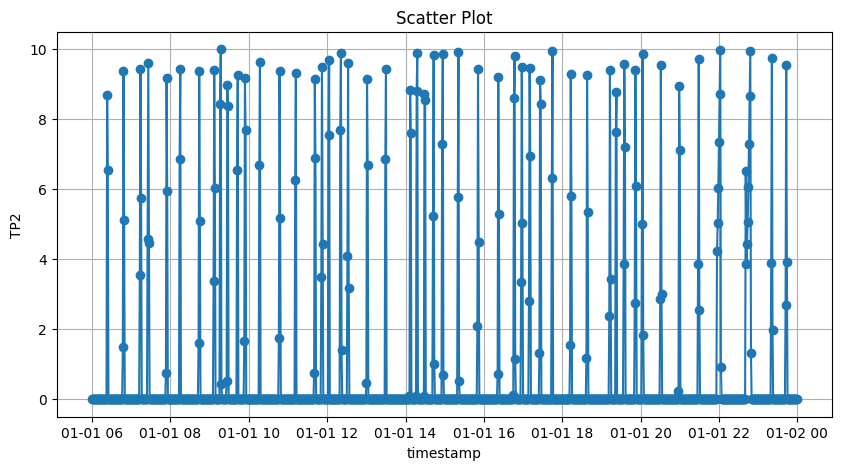

In [42]:
plot_columns(aggregate_as_a_minute(df_day1), "timestamp", "TP2")

/var/folders/pr/50hgsxm96n7_g8xjv3rsnryw0000gn/T/ipykernel_18402/2391920373.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_minute_avg_day1 = df_day1.resample('T').mean().reset_index()
/var/folders/pr/50hgsxm96n7_g8xjv3rsnryw0000gn/T/ipykernel_18402/2391920373.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_minute_avg_day1 = df_day1.resample('T').mean().reset_index()


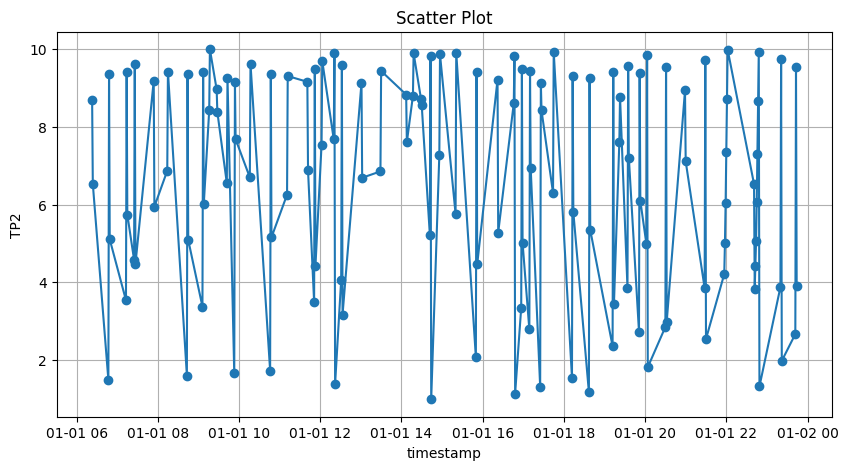

In [43]:
plot_columns(aggregate_as_a_minute(df_day1)[aggregate_as_a_minute(df_day1)["TP2"]>0.95], "timestamp", "TP2")

/var/folders/pr/50hgsxm96n7_g8xjv3rsnryw0000gn/T/ipykernel_18402/2391920373.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_minute_avg_day1 = df_day1.resample('T').mean().reset_index()
/var/folders/pr/50hgsxm96n7_g8xjv3rsnryw0000gn/T/ipykernel_18402/2391920373.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_minute_avg_day1 = df_day1.resample('T').mean().reset_index()


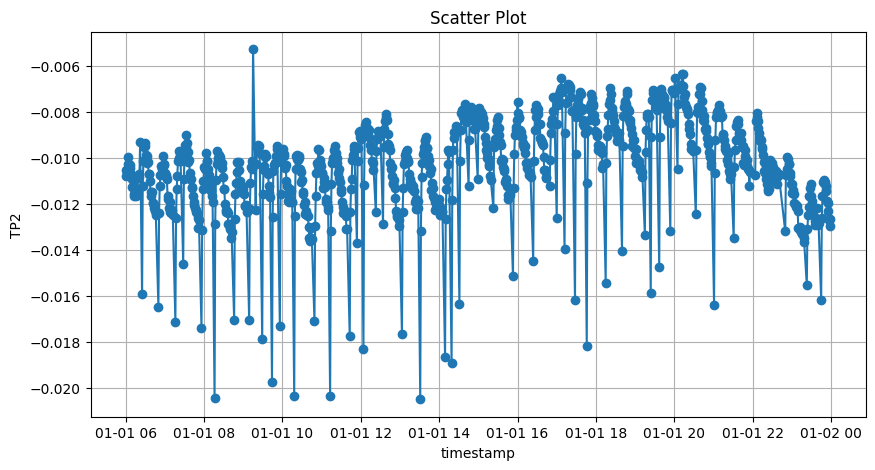

In [44]:
plot_columns(aggregate_as_a_minute(df_day1)[aggregate_as_a_minute(df_day1)["TP2"]<0.00], "timestamp", "TP2")

In [46]:
specific_date2 = '2022-01-28'
specific_date3 = '2022-03-18'

In [47]:
df_day2 = filter_a_day(specific_date2)
df_day3 = filter_a_day(specific_date3)

/var/folders/pr/50hgsxm96n7_g8xjv3rsnryw0000gn/T/ipykernel_18402/2391920373.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_minute_avg_day1 = df_day1.resample('T').mean().reset_index()


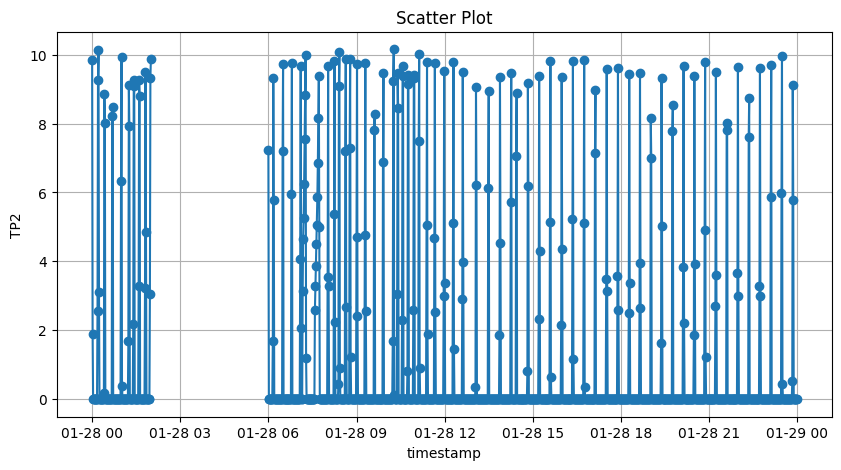

In [48]:
plot_columns(aggregate_as_a_minute(df_day2), "timestamp", "TP2")

/var/folders/pr/50hgsxm96n7_g8xjv3rsnryw0000gn/T/ipykernel_18402/2391920373.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_minute_avg_day1 = df_day1.resample('T').mean().reset_index()
/var/folders/pr/50hgsxm96n7_g8xjv3rsnryw0000gn/T/ipykernel_18402/2391920373.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_minute_avg_day1 = df_day1.resample('T').mean().reset_index()


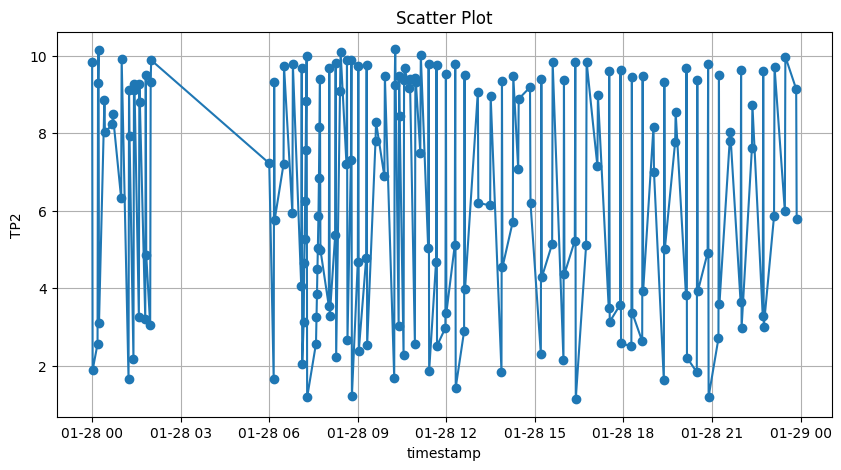

In [53]:
plot_columns(aggregate_as_a_minute(df_day2)[aggregate_as_a_minute(df_day2)["TP2"]>0.95], "timestamp", "TP2")

/var/folders/pr/50hgsxm96n7_g8xjv3rsnryw0000gn/T/ipykernel_18402/2391920373.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_minute_avg_day1 = df_day1.resample('T').mean().reset_index()
/var/folders/pr/50hgsxm96n7_g8xjv3rsnryw0000gn/T/ipykernel_18402/2391920373.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_minute_avg_day1 = df_day1.resample('T').mean().reset_index()


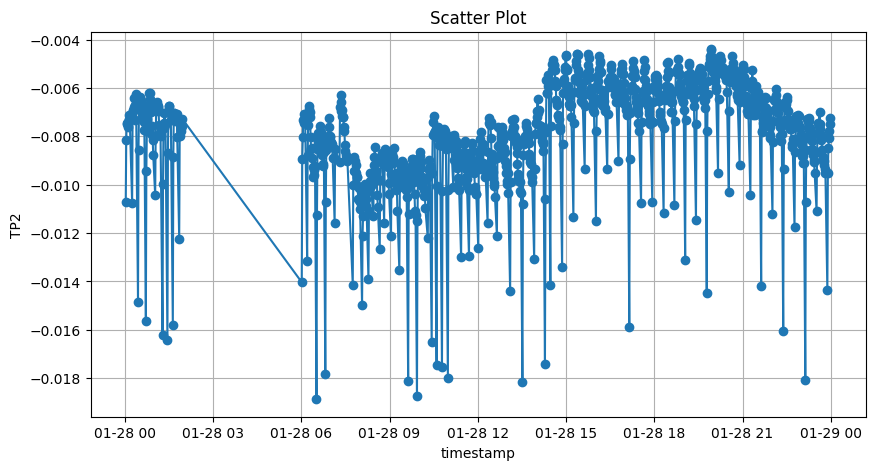

In [54]:
plot_columns(aggregate_as_a_minute(df_day2)[aggregate_as_a_minute(df_day2)["TP2"]<00], "timestamp", "TP2")

/var/folders/pr/50hgsxm96n7_g8xjv3rsnryw0000gn/T/ipykernel_18402/2391920373.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_minute_avg_day1 = df_day1.resample('T').mean().reset_index()


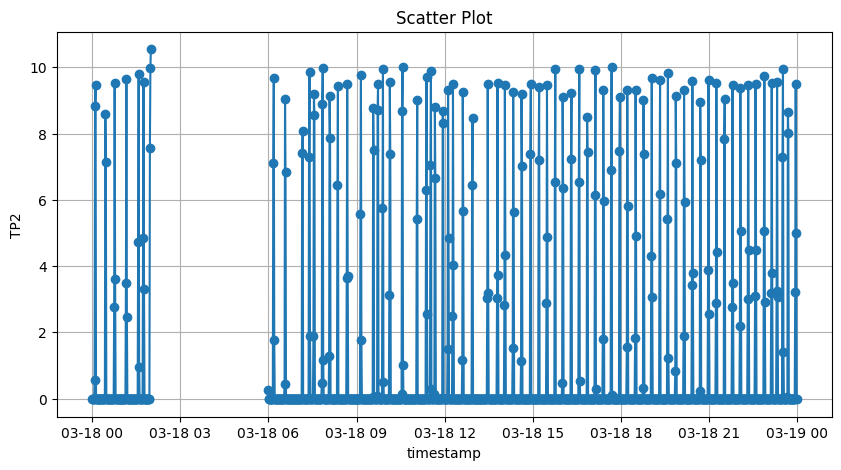

/var/folders/pr/50hgsxm96n7_g8xjv3rsnryw0000gn/T/ipykernel_18402/2391920373.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_minute_avg_day1 = df_day1.resample('T').mean().reset_index()
/var/folders/pr/50hgsxm96n7_g8xjv3rsnryw0000gn/T/ipykernel_18402/2391920373.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_minute_avg_day1 = df_day1.resample('T').mean().reset_index()


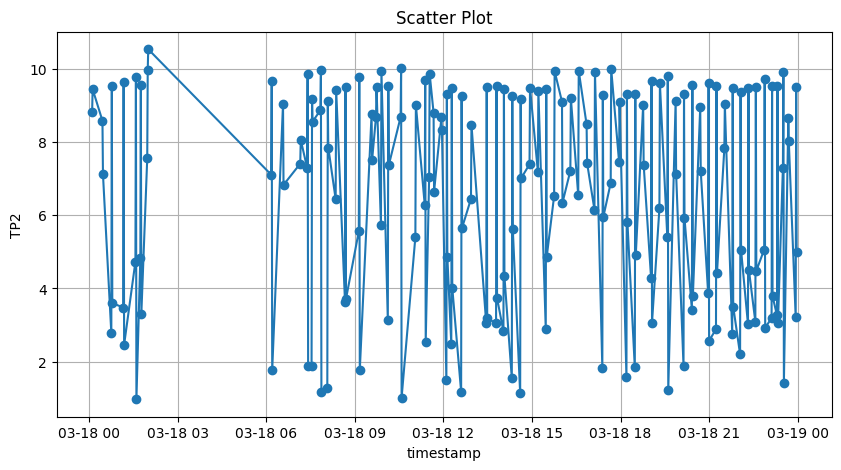

/var/folders/pr/50hgsxm96n7_g8xjv3rsnryw0000gn/T/ipykernel_18402/2391920373.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_minute_avg_day1 = df_day1.resample('T').mean().reset_index()
/var/folders/pr/50hgsxm96n7_g8xjv3rsnryw0000gn/T/ipykernel_18402/2391920373.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_minute_avg_day1 = df_day1.resample('T').mean().reset_index()


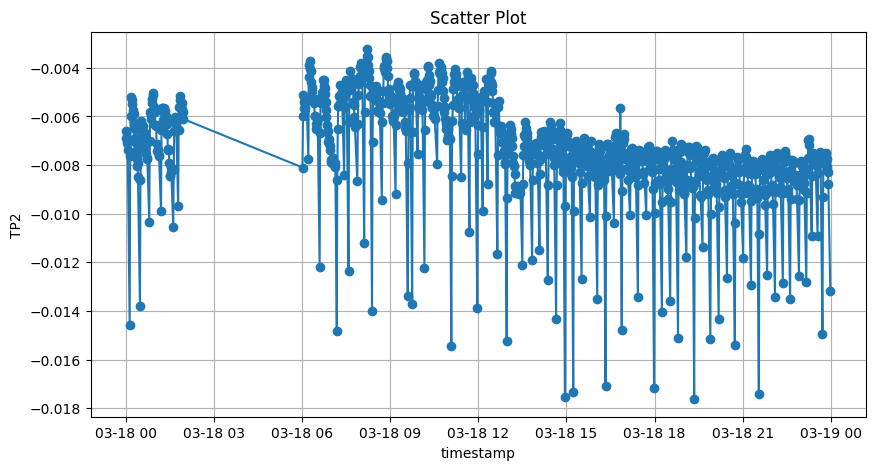

In [56]:
plot_columns(aggregate_as_a_minute(df_day3), "timestamp", "TP2")
plot_columns(aggregate_as_a_minute(df_day3)[aggregate_as_a_minute(df_day3)["TP2"]>0.95], "timestamp", "TP2")
plot_columns(aggregate_as_a_minute(df_day3)[aggregate_as_a_minute(df_day3)["TP2"]<00], "timestamp", "TP2")

/var/folders/pr/50hgsxm96n7_g8xjv3rsnryw0000gn/T/ipykernel_18402/2391920373.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_minute_avg_day1 = df_day1.resample('T').mean().reset_index()


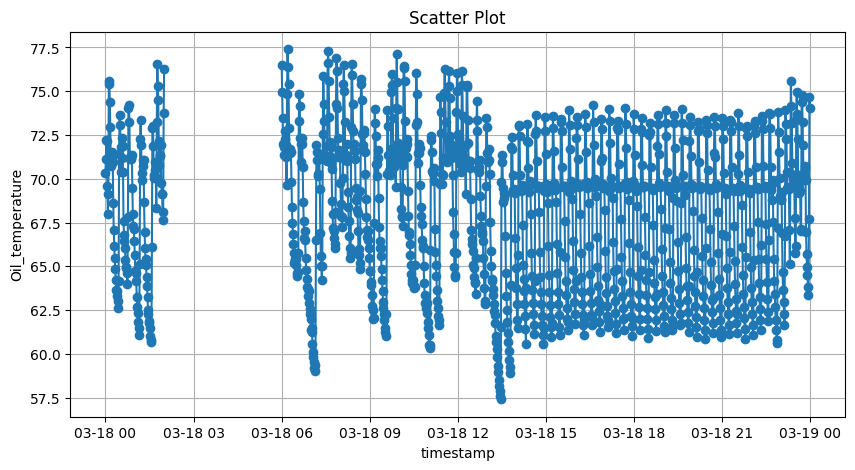

In [59]:
plot_columns(aggregate_as_a_minute(df_day3), "timestamp", "Oil_temperature")

/var/folders/pr/50hgsxm96n7_g8xjv3rsnryw0000gn/T/ipykernel_18402/2391920373.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_minute_avg_day1 = df_day1.resample('T').mean().reset_index()


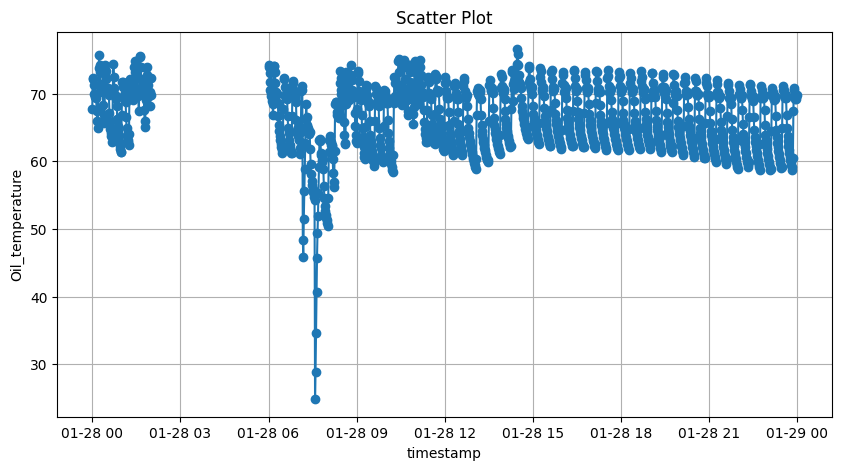

In [60]:
plot_columns(aggregate_as_a_minute(df_day2), "timestamp", "Oil_temperature")

/var/folders/pr/50hgsxm96n7_g8xjv3rsnryw0000gn/T/ipykernel_18402/2391920373.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_minute_avg_day1 = df_day1.resample('T').mean().reset_index()


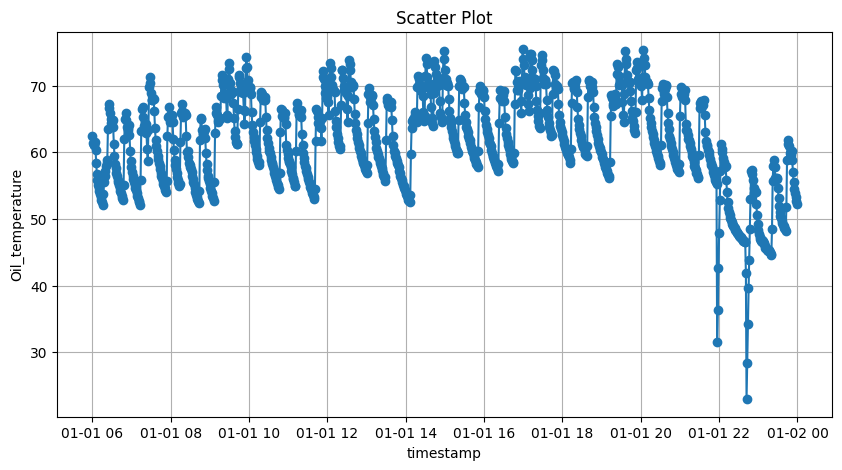

In [61]:
plot_columns(aggregate_as_a_minute(df_day1), "timestamp", "Oil_temperature")

/var/folders/pr/50hgsxm96n7_g8xjv3rsnryw0000gn/T/ipykernel_18402/2391920373.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_minute_avg_day1 = df_day1.resample('T').mean().reset_index()


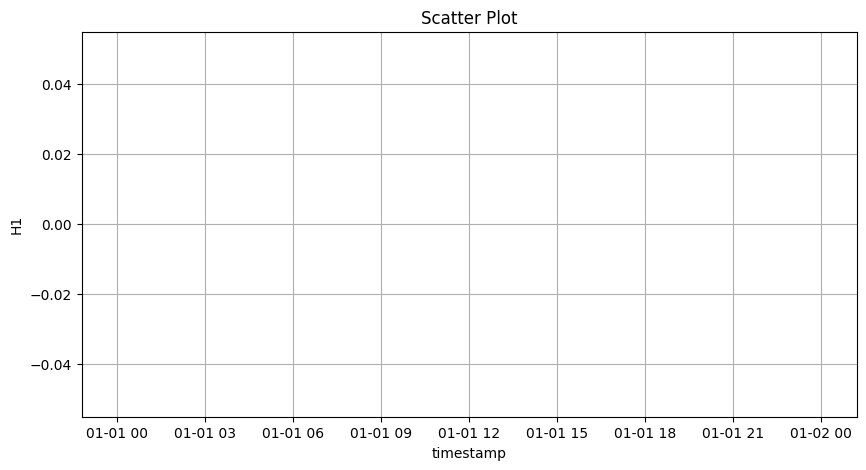

In [70]:
df_day4 = filter_a_day("2022-11-07")

plot_columns(aggregate_as_a_minute(df_day4), "timestamp", "H1")

In [69]:
df_day4.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Flowmeter,Motor_current,COMP,...,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,gpsLong,gpsLat,gpsSpeed,gpsQuality
